In [1]:
import sys
sys.path.append('/Users/linggeli/neuro_replay/neural_decoding')

In [2]:
import numpy as np

In [3]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from matplotlib import rcParams
plt.style.use('seaborn-white')
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Georgia'

In [5]:
from helper import latent_models, latent_grid
from visualize import plot_latent_boundary

In [6]:
def filter_trials(trial_info):
    rat_correct = trial_info[:, 0] == 1
    in_sequence = trial_info[:, 1] == 1
    not_odor_e = trial_info[:, 3] < 5
    select = rat_correct & in_sequence & not_odor_e
    return select

## Load latent representation for each rat
For each rat, the latent layer of the neural network decoding model is calculated for a range of time windows between -2 and 2s during a trial. 

In [7]:
trial_info = np.load('/Users/linggeli/neuroscience/data/processed_data/superchris_trial_info.npy')
trial_indices = filter_trials(trial_info)
target_superchris = trial_info[trial_indices, 3] - 1
latent_superchris = np.load('/Users/linggeli/downloads/latent/superchris_latent.npy')
#print(target_superchris.shape)
#print(latent_superchris.shape)

In [8]:
trial_info = np.load('/Users/linggeli/neuroscience/data/processed_data/stella_trial_info.npy')
trial_indices = filter_trials(trial_info)
target_stella = trial_info[trial_indices, 3] - 1
latent_stella = np.load('/Users/linggeli/downloads/latent/stella_latent.npy')
#print(target_stella.shape)
#print(latent_stella.shape)

In [9]:
trial_info = np.load('/Users/linggeli/neuroscience/data/processed_data/buchanan_trial_info.npy')
trial_indices = filter_trials(trial_info)
target_buchanan = trial_info[trial_indices, 3] - 1
latent_buchanan = np.load('/Users/linggeli/downloads/latent/buchanan_latent.npy')
#print(target_buchanan.shape)
#print(latent_buchanan.shape)

In [10]:
trial_info = np.load('/Users/linggeli/neuroscience/data/processed_data/barat_trial_info.npy')
trial_indices = filter_trials(trial_info)
target_barat = trial_info[trial_indices, 3] - 1
latent_barat = np.load('/Users/linggeli/downloads/latent/barat_latent_0.npy')
#print(target_barat.shape)
#print(latent_barat.shape)

In [11]:
trial_info = np.load('/Users/linggeli/neuroscience/data/Mitt/mitt_trial_info.npy')
trial_indices = filter_trials(trial_info)
target_mitt = trial_info[trial_indices, 3] - 1
latent_mitt = np.load('/Users/linggeli/downloads/latent/mitt_latent_0.npy')
#print(target_mitt.shape)
#print(latent_mitt.shape)

## Odor decoding with latent representation
To visualize odor replay, we plot each trial as a point in the low dimensional latent space. The latent space is divided into areas of different odors and the points should move across these areas in a sequential manner.

In [27]:
pca_buchanan, clf_buchanan = latent_models(latent_buchanan, target_buchanan, 11)
pca_superchris, clf_superchris = latent_models(latent_superchris, target_superchris, 11)
pca_stella, clf_stella = latent_models(latent_stella, target_stella, 11)
pca_barat, clf_barat = latent_models(latent_barat, target_barat, 11)
pca_mitt, clf_mitt = latent_models(latent_mitt, target_mitt, 11)

In [28]:
def add_cluster(pca_model, clf_model, odor_latent):
    """
    Within each time window, all the points/trials from all the rats are assigned to different odor clusters.
    """
    count_matrix = np.zeros((10, 4))
    proba_matrix = np.zeros((10, 4))
    for i in range(10):
        test = clf_model.predict(pca_model.transform(odor_latent[:, i + 8, :]))
        proba = clf_model.predict_proba(pca_model.transform(odor_latent[:, i + 8, :]))
        cluster_x = np.random.normal(0, 0.1, np.sum(test == 0))
        cluster_y = np.random.normal(0, 0.1, np.sum(test == 0))
        plt.scatter(cluster_x + i, cluster_y, s=50 * np.max(proba[test == 0], axis=1), alpha=0.5, c='deepskyblue')
        cluster_x = np.random.normal(0, 0.1, np.sum(test == 1))
        cluster_y = np.random.normal(0, 0.1, np.sum(test == 1))
        plt.scatter(cluster_x + i, cluster_y + 1, s=50 * np.max(proba[test == 1], axis=1), alpha=0.5, c='tan')
        cluster_x = np.random.normal(0, 0.1, np.sum(test == 2))
        cluster_y = np.random.normal(0, 0.1, np.sum(test == 2))
        plt.scatter(cluster_x + i, cluster_y + 2, s=50 * np.max(proba[test == 2], axis=1), alpha=0.5, c='mediumseagreen')
        cluster_x = np.random.normal(0, 0.1, np.sum(test == 3))
        cluster_y = np.random.normal(0, 0.1, np.sum(test == 3))
        plt.scatter(cluster_x + i, cluster_y + 3, s=50 * np.max(proba[test == 3], axis=1), alpha=0.5, c='purple')
        for j in range(4):
            count_matrix[i, j] = np.sum(test == j)
            proba_matrix[i, j] = np.sum(proba[:, j])
    return count_matrix, proba_matrix

In [29]:
odor_latent_buchanan = latent_buchanan[target_buchanan == 1, :, :]
odor_latent_stella = latent_stella[target_stella == 1, :, :]
odor_latent_superchris = latent_superchris[target_superchris == 1, :, :]
odor_latent_barat = latent_barat[target_barat == 1, :, :]
odor_latent_mitt = latent_mitt[target_mitt == 1, :, :]
#print(odor_latent_buchanan.shape)
#print(odor_latent_stella.shape)
#print(odor_latent_superchris.shape)
#print(odor_latent_barat.shape)
#print(odor_latent_mitt.shape)

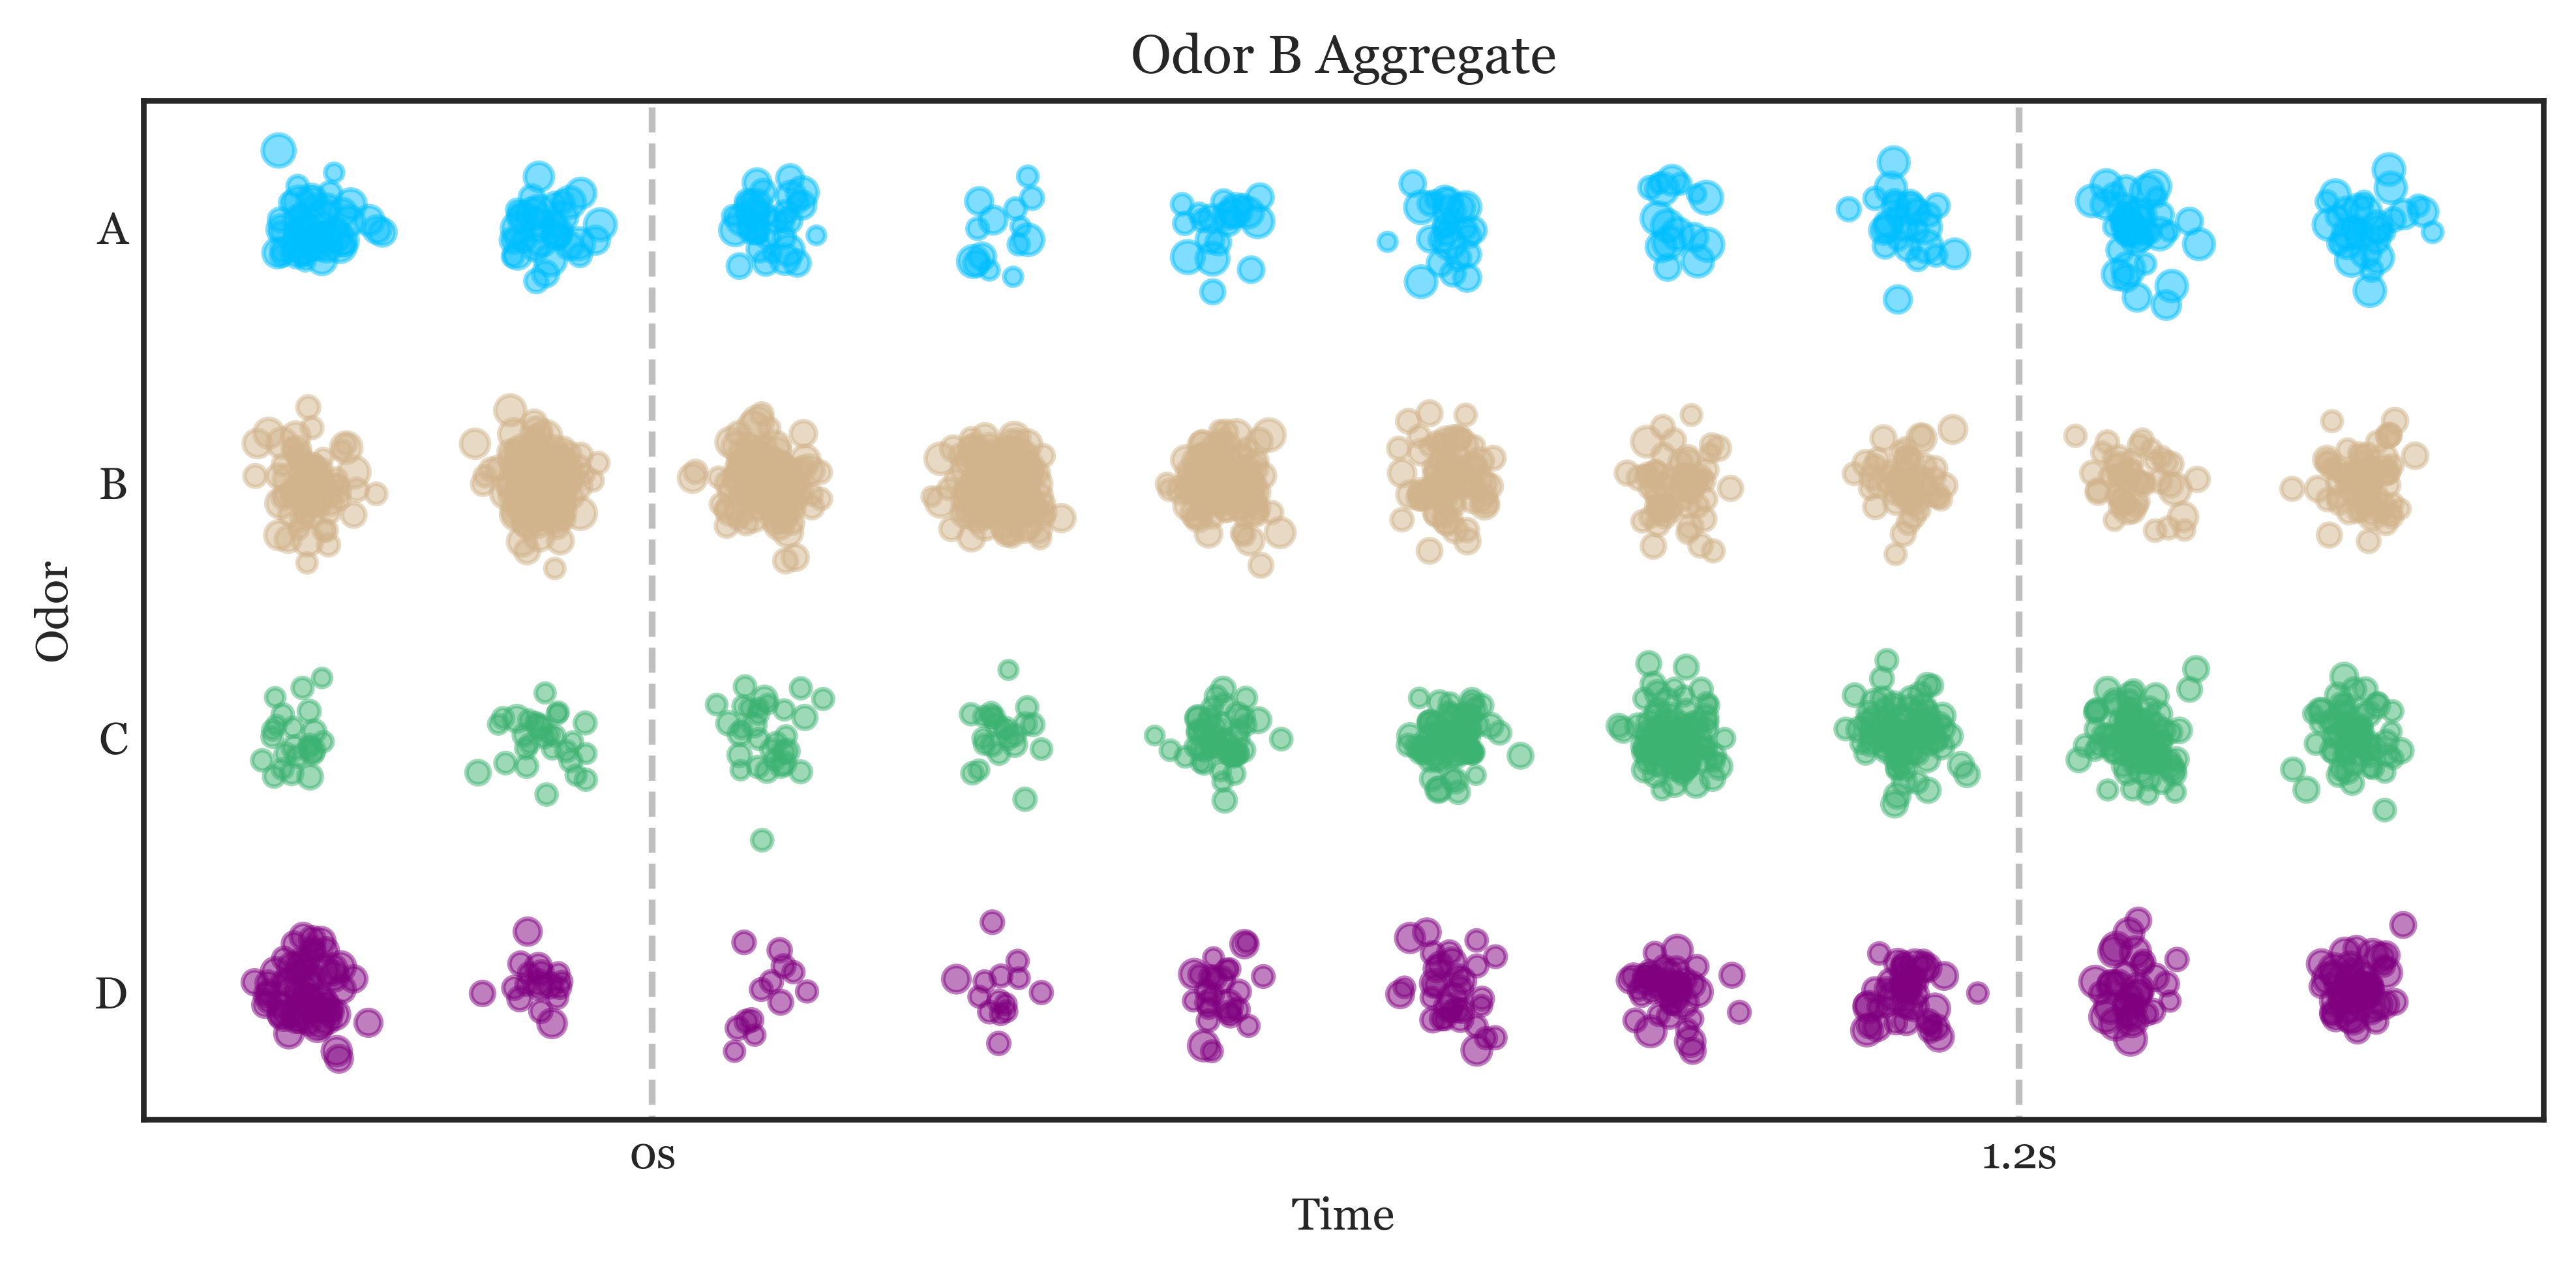

In [30]:
fig = plt.figure(figsize=(8, 4), dpi=500)

count_superchris, proba_superchris = add_cluster(pca_superchris, clf_superchris, odor_latent_superchris)
count_stella, proba_stella = add_cluster(pca_stella, clf_stella, odor_latent_stella)
count_buchanan, proba_buchanan = add_cluster(pca_buchanan, clf_buchanan, odor_latent_buchanan)
count_barat, proba_barat = add_cluster(pca_barat, clf_barat, odor_latent_barat)
count_mitt, proba_mitt = add_cluster(pca_mitt, clf_mitt, odor_latent_mitt)

plt.plot([1.5, 1.5], [-1, 4], '--', c='gray', alpha=0.5)
plt.plot([7.5, 7.5], [-1, 4], '--', c='gray', alpha=0.5)
plt.ylim(-0.5, 3.5)
plt.xticks([1.5, 7.5], ['0s', '1.2s'])
plt.yticks([0, 1, 2, 3], ['A', 'B', 'C', 'D'])

plt.xlabel('Time')
plt.ylabel('Odor')
plt.title('Odor B Aggregate')
plt.gca().invert_yaxis()

fig.tight_layout()
#plt.savefig('odor_b_aggregate.png', dpi=500)
#plt.savefig('odor_b_aggregate.eps', format='eps', dpi=500)

plt.show()

In [16]:
count_odor_B = count_superchris + count_stella + count_buchanan + count_barat + count_mitt
print(count_odor_B / np.sum(count_odor_B[0]))

[[0.26190476 0.33809524 0.10952381 0.29047619]
 [0.16190476 0.61904762 0.13333333 0.08571429]
 [0.16190476 0.62857143 0.14761905 0.06190476]
 [0.06666667 0.75714286 0.10952381 0.06666667]
 [0.0952381  0.55714286 0.22857143 0.11904762]
 [0.12380952 0.35714286 0.36190476 0.15714286]
 [0.07619048 0.27619048 0.43809524 0.20952381]
 [0.12380952 0.25238095 0.42857143 0.1952381 ]
 [0.17619048 0.22380952 0.44285714 0.15714286]
 [0.14285714 0.32380952 0.3047619  0.22857143]]


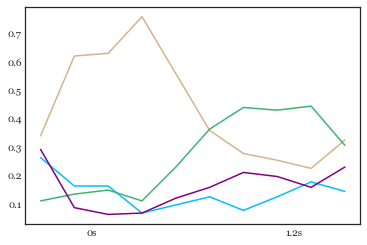

In [17]:
prop_odor_B = count_odor_B / np.sum(count_odor_B[0])
plt.plot(prop_odor_B[:, 0], color='deepskyblue')
plt.plot(prop_odor_B[:, 1], color='tan')
plt.plot(prop_odor_B[:, 2], color='mediumseagreen')
plt.plot(prop_odor_B[:, 3], color='purple')
plt.xticks([1.5, 7.5], ['0s', '1.2s'])
plt.show()

In [19]:
odor_latent_buchanan = latent_buchanan[target_buchanan == 2, :, :]
odor_latent_stella = latent_stella[target_stella == 2, :, :]
odor_latent_superchris = latent_superchris[target_superchris == 2, :, :]
odor_latent_barat = latent_barat[target_barat == 2, :, :]
odor_latent_mitt = latent_mitt[target_mitt == 2, :, :]
#print(odor_latent_buchanan.shape)
#print(odor_latent_stella.shape)
#print(odor_latent_superchris.shape)
#print(odor_latent_barat.shape)
#print(odor_latent_mitt.shape)

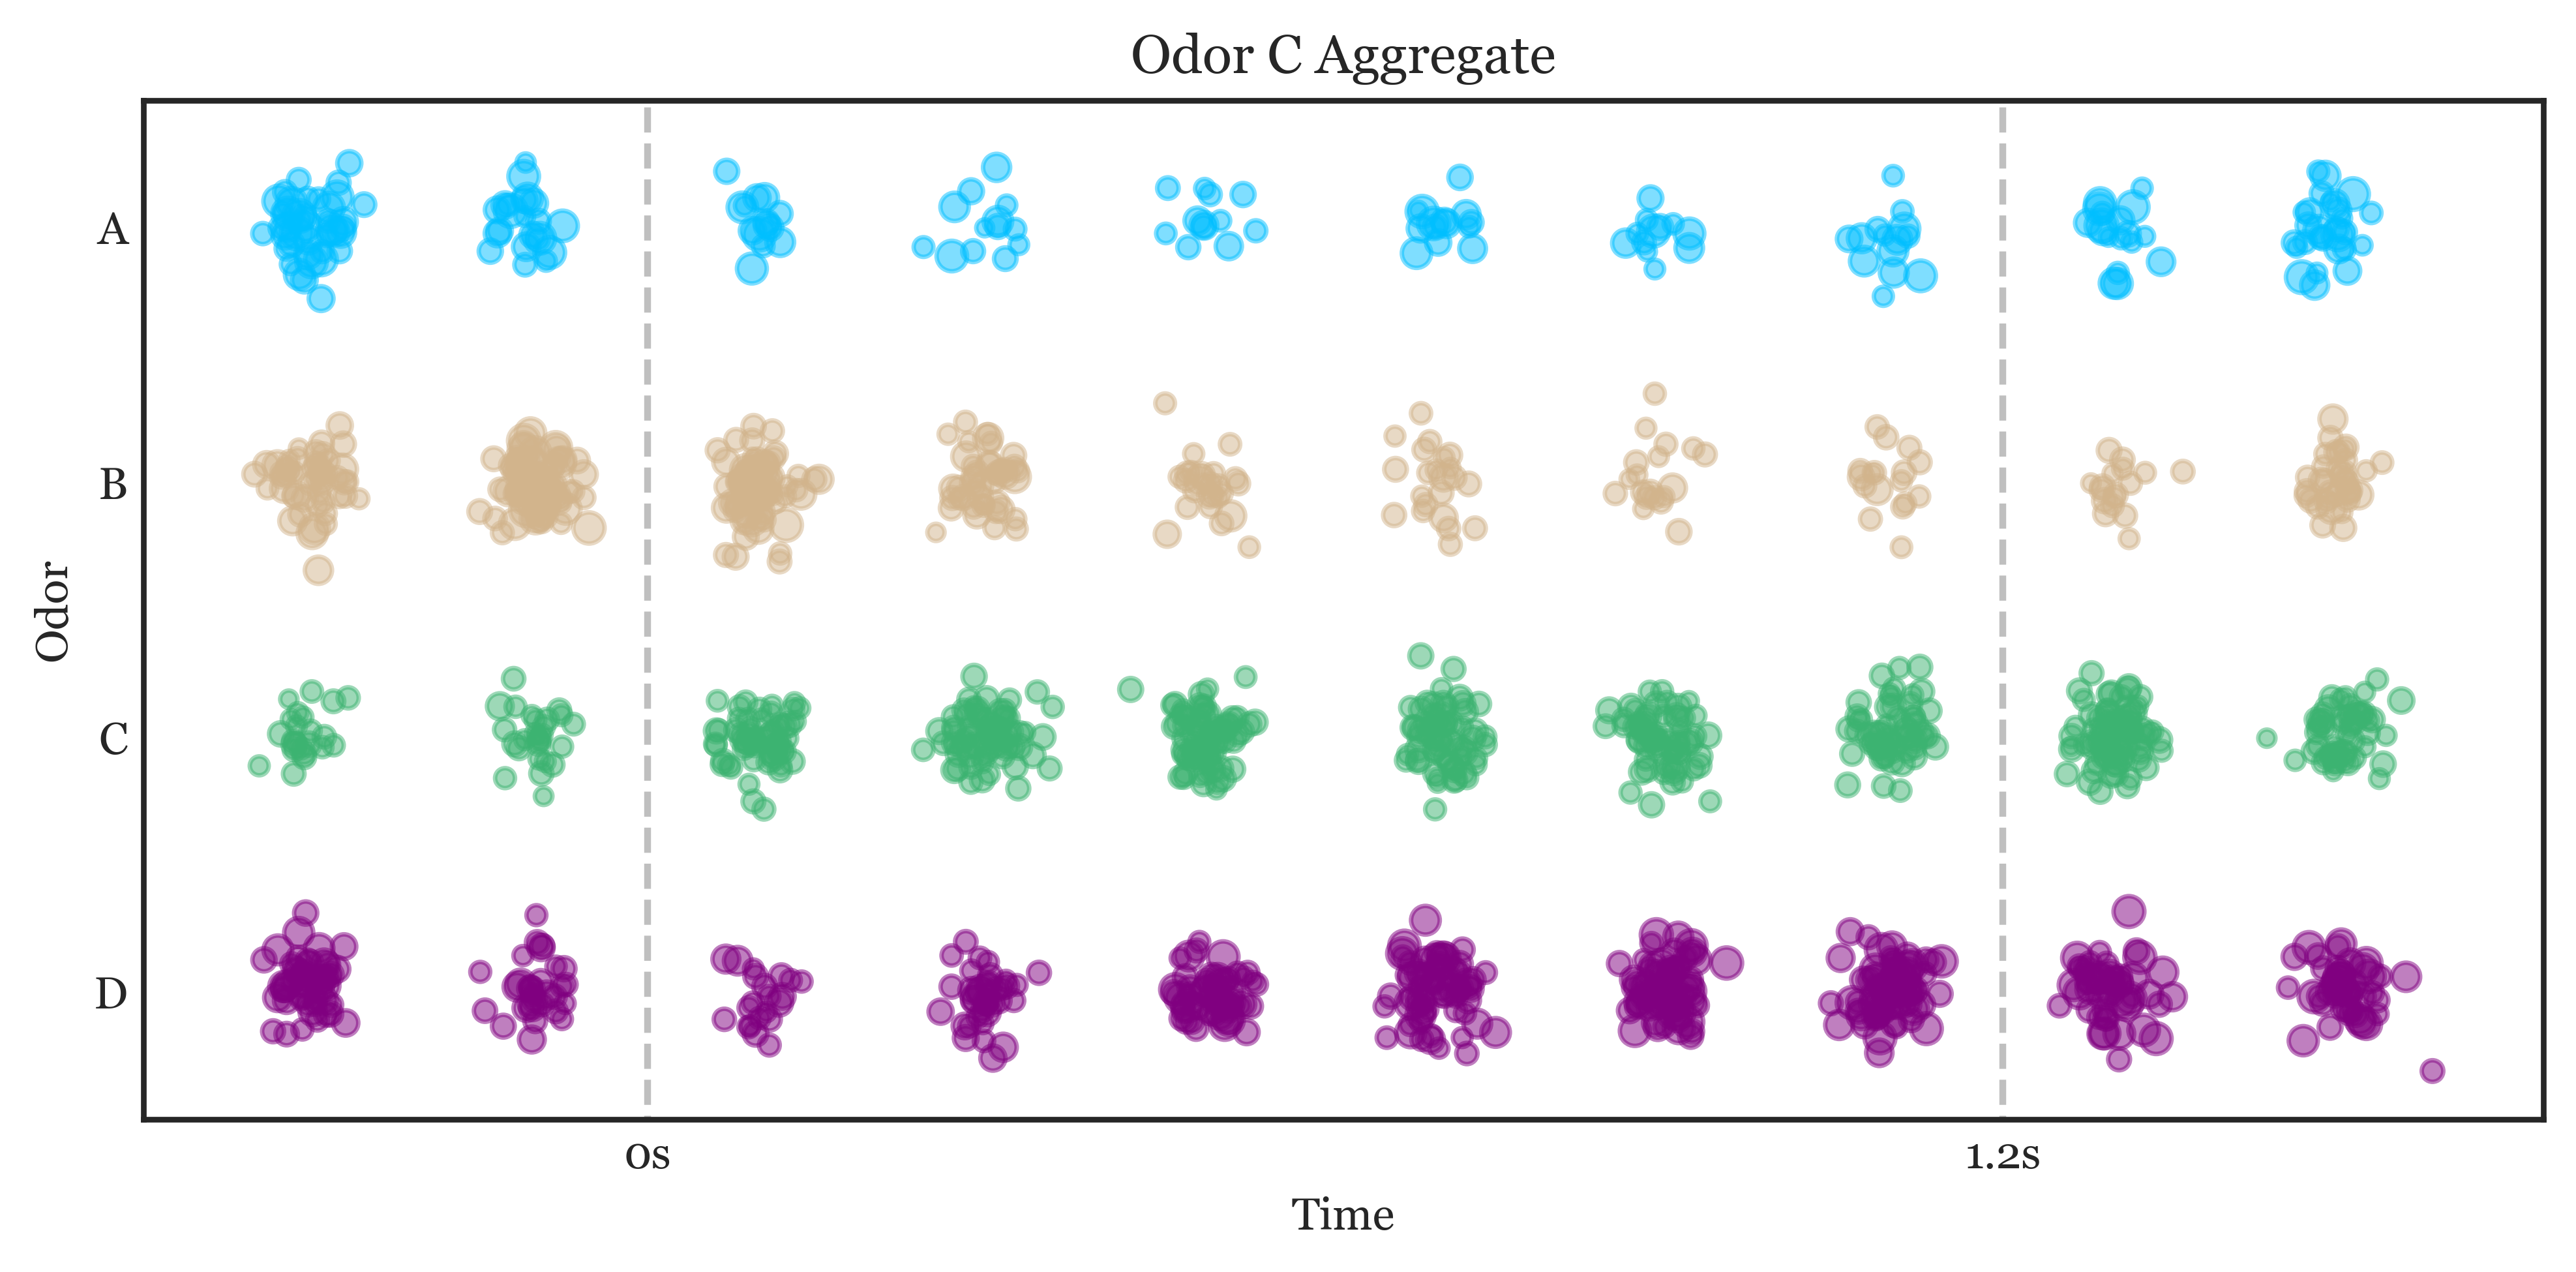

In [20]:
fig = plt.figure(figsize=(8, 4), dpi=500)

count_superchris, proba_superchris = add_cluster(pca_superchris, clf_superchris, odor_latent_superchris)
count_stella, proba_stella = add_cluster(pca_stella, clf_stella, odor_latent_stella)
count_buchanan, proba_buchanan = add_cluster(pca_buchanan, clf_buchanan, odor_latent_buchanan)
count_barat, proba_barat = add_cluster(pca_barat, clf_barat, odor_latent_barat)
count_mitt, proba_mitt = add_cluster(pca_mitt, clf_mitt, odor_latent_mitt)

plt.plot([1.5, 1.5], [-1, 4], '--', c='gray', alpha=0.5)
plt.plot([7.5, 7.5], [-1, 4], '--', c='gray', alpha=0.5)
plt.ylim(-0.5, 3.5)
plt.xticks([1.5, 7.5], ['0s', '1.2s'])
plt.yticks([0, 1, 2, 3], ['A', 'B', 'C', 'D'])

plt.xlabel('Time')
plt.ylabel('Odor')
plt.title('Odor C Aggregate')
plt.gca().invert_yaxis()

fig.tight_layout()
#plt.savefig('odor_c_aggregate.png', dpi=500)
#plt.savefig('odor_c_aggregate.eps', format='eps', dpi=500)

plt.show()

In [21]:
count_odor_C = count_superchris + count_stella + count_buchanan + count_barat + count_mitt
print(count_odor_C / np.sum(count_odor_C[0]))

[[0.24848485 0.30909091 0.13939394 0.3030303 ]
 [0.13333333 0.51515152 0.16363636 0.18787879]
 [0.08484848 0.42424242 0.36363636 0.12727273]
 [0.07878788 0.26060606 0.43636364 0.22424242]
 [0.07272727 0.15757576 0.42424242 0.34545455]
 [0.08484848 0.13333333 0.38787879 0.39393939]
 [0.07272727 0.11515152 0.4        0.41212121]
 [0.08484848 0.1030303  0.35151515 0.46060606]
 [0.10909091 0.1030303  0.48484848 0.3030303 ]
 [0.16969697 0.21818182 0.32121212 0.29090909]]


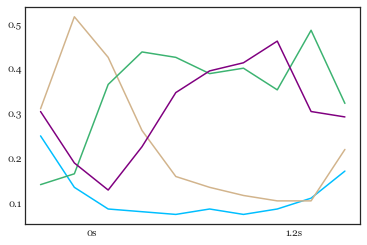

In [22]:
prop_odor_C = count_odor_C / np.sum(count_odor_C[0])
plt.plot(prop_odor_C[:, 0], color='deepskyblue')
plt.plot(prop_odor_C[:, 1], color='tan')
plt.plot(prop_odor_C[:, 2], color='mediumseagreen')
plt.plot(prop_odor_C[:, 3], color='purple')
plt.xticks([1.5, 7.5], ['0s', '1.2s'])
plt.show()